# EllaBot Report

Introduction
------

In a search and rescue problem, an agent is presented a navigation target which it must reach as quickly as possible. In our formulation of the problem, the agent is only allowed to manipulate its linear and angular velocities, which is consistent with the capabilities of the TurtleBots and SegBots. In order to solve this problem, we used Sarsa($\lambda$) with value function approximation and policy gradient methods. We present a comparison of these two methods. However, these methods are inflexible in the face of changing environments. We investigated the use of a lifelong learning algorithm with policy gradients, PG-ELLA.

The code for our world and learning algorithms is available on [our GitHub](http://github.com/EllaBot/). First, the world can be setup as follows:

In [4]:
%matplotlib inline
from worldsim import WorldSim
from worldsim.agents import SarsaAgent, State
from worldsim.tasks import SearchTask
from random import random
import matplotlib.pyplot as plt

In [5]:
task = SearchTask(5.0, 5.0)
world = WorldSim(10.0, 10.0, 0.0, 0.0, task)
agent = SarsaAgent(world, task)
world.agent = agent

Sarsa($\lambda$)
------------

We used True Online TD($\lambda$) for our Sarsa() implementation[1]. It has a conceptually simple forward view that can be implemented online inexpensively. Because our problem has continous state and action spaces, we must use a function approximator. We decided to use the Fourier basis[2].

Let's run an experiment, with one hundred episodes.

Here's some $\LaTeX$ because I can.

In [6]:
tasksolved = False
episode_rewards = []
for i in range(2):
    while tasksolved is False:
        agent.act()
        agent_state = agent.getstate()
        tasksolved = world.task.stateisfinal(agent_state)
    
    episode_rewards.append(agent.episode_reward)
    agent.episode_reward = 0
    world.reset()
    task.target_x = random() * world.width
    task.target_y = random() * world.height
    tasksolved = False

Plotting the results is easy!

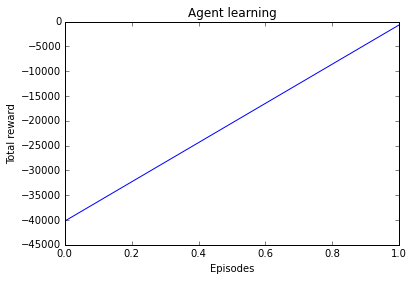

In [7]:
x = [x for x in range(len(episode_rewards))]
y = episode_rewards
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.title('Agent learning')
plt.plot(x, y, 'b')